<a href="https://colab.research.google.com/github/BernardoAflalo/ml-examples/blob/main/Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret  &> /dev/null
#!pip install requests==2.23.0
#!pip install folium==0.2.1

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
np.__version__

'1.21.5'

In [ ]:
import pandas as pd
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
import pandas as pd; import numpy as np; import os; import io; import matplotlib.pyplot as plt; import seaborn as sns; import datetime
from sklearn import metrics, datasets, ensemble, tree
from sklearn.linear_model import LinearRegression; from sklearn.model_selection import train_test_split; from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor; from sklearn.tree import DecisionTreeRegressor;from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier; from sklearn.metrics import accuracy_score; from sklearn.tree import export_graphviz; from sklearn.metrics import confusion_matrix
from six import StringIO; from IPython.display import Image; import pydotplus
from google.colab import files

uploaded = files.upload()
data2 = pd.read_csv(io.BytesIO(uploaded['COMBINED.csv']), encoding='latin-1')

Saving COMBINED.csv to COMBINED.csv


In [ ]:
#DECISION TREE CONSIDERING CERTAIN VARIABLES AND ROWS

df_1=data2

#add variable considering if number of accidents is over a number or not, define dummies and prepare variables names
df_2 = df_1.assign(OVER_NUM=0)
n1=0
while n1<len(df_2):
    if df_2.at[n1,"A_NUM"]>4:
       df_2.at[n1,"OVER_NUM"]=1
    else:
       df_2.at[n1,"OVER_NUM"]=0
    n1=n1+1
df_3 = pd.get_dummies(df_2)
feature_cols = ['RAIN', 'TEMPERATURE', 'SHIFT_Mati1', 'SHIFT_Mati2', 'SHIFT_Nit1','SHIFT_Nit2', 'SHIFT_Tarda1', 'SHIFT_Tarda2', 'WORKHOLY_Work', 'SEASON_Autumn', 'SEASON_Spring',
       'SEASON_Summer', 'SEASON_Winter']
feature_names1 = ['RAIN', 'TEMPERATURE', '6 to 10', '10 to 14', '22 to 2','2 to 6', '14 to 18', '18 to 22', 'HOLIDAY DAY', 'Autumn', 'Spring','Summer','Winter']

#prepare sets
X=df_3[feature_cols]
y=df_3.OVER_NUM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

#apply a decision tree classifier
tree_object = DecisionTreeClassifier(max_depth=3)
tree_obtained=tree_object.fit(X_train, y_train)

#obtain and check predictions
predictions = tree_obtained.predict(X_test)
accuracy=accuracy_score(y_true = y_test, y_pred = predictions)
print(accuracy); print(confusion_matrix(y_test, predictions))

#graph representation
dot_data = StringIO()
export_graphviz(tree_obtained, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
setup(df_3,target='OVER_NUM')

TypeError: ignored

In [ ]:
from pycaret.clustering import *
exp_name = setup(data = train_data)
tuned_kmeans = tune_model(model = 'kmeans', supervised_target = 'loan_status', fold=3,supervised_type="classification",supervised_estimator="lightgbm")
predict_model(tuned_kmeans)

NameError: ignored

In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = train_data, target = 'loan_status') 

,Description,Value
0,session_id,2965
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1000, 5)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models(exclude=['et','gbc','ada'], fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8112,0.5000,1.0000,0.8112,0.8957,0.0000,0.0000,0.0200
ridge,Ridge Classifier,0.8097,0.0000,0.9982,0.8109,0.8949,-0.0028,-0.0106,0.0333
lr,Logistic Regression,0.8083,0.6696,0.9929,0.8124,0.8936,0.0121,0.0161,0.0700
lda,Linear Discriminant Analysis,0.8069,0.6874,0.9894,0.8131,0.8926,0.0184,0.0341,0.0333
nb,Naive Bayes,0.7983,0.6592,0.9471,0.8288,0.8839,0.1372,0.1577,0.0400
qda,Quadratic Discriminant Analysis,0.7940,0.6510,0.9436,0.8269,0.8814,0.1231,0.1402,0.0333
rf,Random Forest Classifier,0.7926,0.5689,0.9489,0.8225,0.8811,0.0965,0.1218,0.8700
knn,K Neighbors Classifier,0.7868,0.5204,0.9612,0.8110,0.8797,-0.0004,0.0041,0.2000
lightgbm,Light Gradient Boosting Machine,0.7654,0.5949,0.9012,0.8255,0.8617,0.0979,0.1024,0.0867
dt,Decision Tree Classifier,0.7067,0.5141,0.8236,0.8164,0.8200,0.0285,0.0285,0.0367


In [ ]:
dt = create_model('rf', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7554,0.5079,0.9153,0.8084,0.8586,-0.0211,-0.0236
1,0.8069,0.6048,0.9577,0.8303,0.8894,0.1563,0.1862
2,0.8155,0.5940,0.9735,0.8288,0.8954,0.1543,0.2028
Mean,0.7926,0.5689,0.9489,0.8225,0.8811,0.0965,0.1218
SD,0.0265,0.0434,0.0246,0.0100,0.0161,0.0831,0.1030


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8143,0.5,1.0,0.8143,0.8976,0.0,0.0
1,0.8143,0.5,1.0,0.8143,0.8976,0.0,0.0
2,0.8143,0.5,1.0,0.8143,0.8976,0.0,0.0
3,0.8143,0.5,1.0,0.8143,0.8976,0.0,0.0
4,0.8143,0.5,1.0,0.8143,0.8976,0.0,0.0
5,0.8143,0.5,1.0,0.8143,0.8976,0.0,0.0
6,0.8143,0.5,1.0,0.8143,0.8976,0.0,0.0
7,0.8000,0.5,1.0,0.8000,0.8889,0.0,0.0
8,0.8000,0.5,1.0,0.8000,0.8889,0.0,0.0
9,0.8116,0.5,1.0,0.8116,0.8960,0.0,0.0


In [ ]:
predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.794,0.6199,0.9664,0.8099,0.8812,0.1493,0.1925


,monthly_income,debt_to_income,fico_score,home_owner_0,loan_status,Label,Score
0,35685.0,19.950001,675.0,0.0,1,1,0.88
1,50895.0,26.459999,660.0,0.0,1,0,0.59
2,40154.0,16.940001,705.0,1.0,0,1,0.88
3,35092.0,21.790001,670.0,0.0,0,1,0.86
4,30128.0,16.240000,660.0,1.0,1,1,0.76
...,...,...,...,...,...,...,...
296,46800.0,7.000000,665.0,1.0,1,1,0.80
297,60255.0,22.790001,760.0,1.0,0,1,0.96
298,22230.0,13.830000,720.0,1.0,1,1,0.68
299,16146.0,8.730000,670.0,0.0,1,1,1.00


In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

NameError: ignored

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/edneibach/pycaret-jumpstart/main/titanic.csv')

In [ ]:
train_data.describe(include='all')

,home_owner,monthly_income,debt_to_income,fico_score,loan_status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.608000,44038.046000,18.027300,695.990000,0.805000
std,0.488441,35108.230931,8.211567,32.119333,0.396399
min,0.000000,8424.000000,0.000000,660.000000,0.000000
25%,0.000000,26325.000000,12.047500,670.000000,1.000000
50%,1.000000,37440.000000,17.425000,690.000000,1.000000
75%,1.000000,52650.000000,23.485000,710.000000,1.000000
max,1.000000,585000.000000,40.520000,835.000000,1.000000


In [ ]:
import plotly.express as px
fig = px.scatter(titanic, x="Age", y="Fare", color="Sex", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
import plotly.express as px
fig = px.density_heatmap(titanic,  x="Age", y="Fare", marginal_x="rug", marginal_y="histogram")
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(train_data,  x="monthly_income", y="loan_status", animation_frame="Pclass", animation_group="PassengerId",
           size="Fare", color="Pclass", hover_name="PassengerId", facet_col="Pclass",
           log_x=True, size_max=100)
fig.show()

ValueError: ignored

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(train_data, dimensions=["home_owner", "monthly_income", "debt_to_income", "fico_score"], color="loan_status")
fig.show()

In [ ]:
train_data.head()

,home_owner,monthly_income,debt_to_income,fico_score,loan_status
0,1,45630,7.66,710,1
1,1,29835,31.65,685,1
2,1,117000,19.90,760,1
3,1,52650,8.73,670,1
4,0,30303,17.70,665,1


In [ ]:
train_data.drop(['PassengerId','Name'],inplace=True,axis=1)

In [ ]:
# compute correlation matrix using pandas corr() function
corr_df =  train_data.corr(method='pearson') 

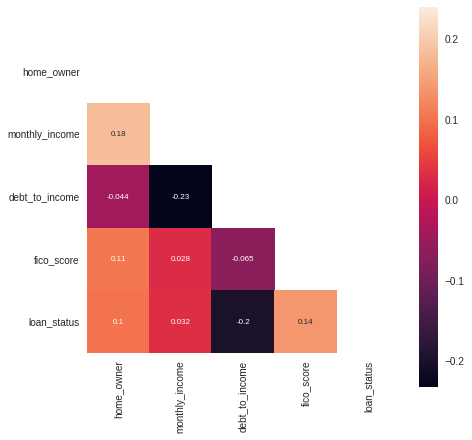

In [ ]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True 
# with sns.axes_style(‘white’):
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(corr_df, mask=mask, square=True, annot = True, annot_kws={'size': 8}, vmax= .24)

In [ ]:
df = pd.read_csv('/content/Extract.xlsx - Sheet1.csv')
df

FileNotFoundError: ignored

In [ ]:
train_data.dtypes

home_owner          int64
monthly_income      int64
debt_to_income    float64
fico_score          int64
loan_status         int64
dtype: object

In [ ]:
expt_basic = setup(train_data, target = 'loan_status', 
            train_size = 0.8,
            numeric_imputation = 'median',
            categorical_imputation = 'mode',
            
            feature_selection = True,
            remove_multicollinearity = True,
            #folds_shuffle = True,
            session_id = 42, # Pseudo random number
            )

,Description,Value
0,session_id,42
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1000, 5)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models(sort="RMSE", exclude=["lar", "et"], fold=5)

ValueError: ignored

In [ ]:
mymodel = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8100,0.0000,1.0000,0.8100,0.8950,0.0000,0.0000,0.023
ridge,Ridge Classifier,0.8100,0.0000,1.0000,0.8100,0.8950,0.0000,0.0000,0.023
dummy,Dummy Classifier,0.8100,0.5000,1.0000,0.8100,0.8950,0.0000,0.0000,0.016
lr,Logistic Regression,0.8088,0.6464,0.9985,0.8098,0.8943,-0.0024,-0.0054,0.413
lda,Linear Discriminant Analysis,0.8050,0.6733,0.9938,0.8090,0.8919,-0.0094,-0.0187,0.054
gbc,Gradient Boosting Classifier,0.8025,0.6129,0.9660,0.8218,0.8879,0.0920,0.1105,0.184
knn,K Neighbors Classifier,0.7962,0.4937,0.9629,0.8177,0.8844,0.0696,0.1031,0.147
qda,Quadratic Discriminant Analysis,0.7950,0.6573,0.9738,0.8112,0.8850,0.0072,-0.0004,0.024
nb,Naive Bayes,0.7938,0.6451,0.9722,0.8109,0.8842,0.0051,-0.0024,0.024
rf,Random Forest Classifier,0.7925,0.5997,0.9475,0.8231,0.8808,0.1039,0.1245,0.635


In [ ]:
mymodel = create_model(mymodel)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5003,0.2503,0.5003,-0.0032,0.3550,0.4942
1,0.5000,0.2500,0.5000,-0.0002,0.3506,0.4978
2,0.5000,0.2500,0.5000,-0.0036,0.3480,0.5000
3,0.5000,0.2500,0.5000,-0.0000,0.3514,0.4971
4,0.5000,0.2500,0.5000,-0.0000,0.3514,0.4971
5,0.5000,0.2500,0.5000,-0.0000,0.3519,0.4967
6,0.5000,0.2500,0.5000,-0.0006,0.3501,0.4982
7,0.5002,0.2503,0.5003,-0.0029,0.3548,0.4943
8,0.5000,0.2500,0.5000,-0.0007,0.3500,0.4983
9,0.5000,0.2500,0.5000,-0.0001,0.3523,0.4964


In [ ]:
mymodel = tune_model(mymodel)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5003,0.2503,0.5003,-0.0032,0.3550,0.4942
1,0.5000,0.2500,0.5000,-0.0002,0.3506,0.4978
2,0.5000,0.2500,0.5000,-0.0036,0.3480,0.5000
3,0.5000,0.2500,0.5000,-0.0000,0.3514,0.4971
4,0.5000,0.2500,0.5000,-0.0000,0.3514,0.4971
5,0.5000,0.2500,0.5000,-0.0000,0.3519,0.4967
6,0.5000,0.2500,0.5000,-0.0006,0.3501,0.4982
7,0.5002,0.2503,0.5003,-0.0029,0.3548,0.4943
8,0.5000,0.2500,0.5000,-0.0007,0.3500,0.4983
9,0.5000,0.2500,0.5000,-0.0001,0.3523,0.4964


In [ ]:
predict_model(mymodel);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.5,0.25,0.5,-0.0001,0.351,0.497


In [ ]:
mymodel = finalize_model(mymodel)

In [ ]:
save_model(mymodel,'mymodel')

In [ ]:
from pycaret.classification import load_model, predict_model
mymodel = load_model('mymodel')

In [ ]:
testdata = pd.DataFrame(columns=titanic.columns)
testdata.loc[0] = ['','1','female','20','1','0','',180,'','S']
### This will make a dummy dataframe for predictions

In [ ]:
testdata

In [ ]:
predictions = predict_model(mymodel, testdata)
print("Survived: ", predictions['Label'].loc[0])
predictions

In [ ]:
predictions